In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import keras
import os

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K


# dimensions of our images.
img_width, img_height = 512, 512



In [5]:
validation_data_dir = '.../validation_images'
train_data_dir = '.../training_images'
print(os.listdir(validation_data_dir))

['.DS_Store', 'flood_images', 'non_flood']


In [6]:
total_train = 0
for i in os.listdir(train_data_dir):
    if not i.endswith('.DS_Store'):
        total_train += len(os.listdir(os.path.join(train_data_dir,i)))
  
total_val = 0 
for j in os.listdir(train_data_dir):
    if not j.endswith('.DS_Store'):
        total_val += len(os.listdir(os.path.join(validation_data_dir,j)))
  

nb_train_samples = total_train
nb_validation_samples = total_val

nb_train_samples = 3000
nb_validation_samples = 1500
epochs = 2
batch_size = 16
num_classes = 2

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# model.add(Dense(1))
# model.add(Activation('sigmoid'))
## THIS LINE DETERMINES NUM OUTPUT CLASSES:
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True, vertical_flip=True, rotation_range=60)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

hist = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('flood_classifier.h5')

Found 441 images belonging to 2 classes.
Found 199 images belonging to 2 classes.
Epoch 1/2
187/187 [==============================] - 1625s 9s/step - loss: 5.6691 - acc: 0.6460 - val_loss: 11.3449 - val_acc: 0.2961
Epoch 2/2
187/187 [==============================] - 1193s 6s/step - loss: 5.7121 - acc: 0.6456 - val_loss: 11.2318 - val_acc: 0.3032


In [7]:
history = hist

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


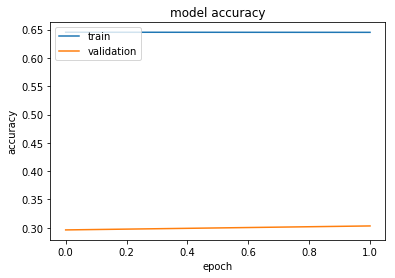

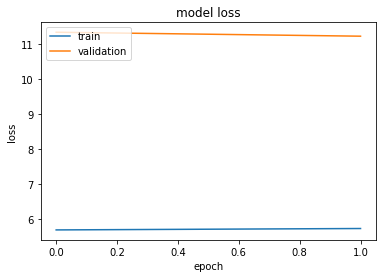

In [8]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('loss.png')

plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('loss.png')

plt.show()


In [9]:
plt.imshow(batch[3])
plt.show()

NameError: name 'batch' is not defined